In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [7]:
# to open cvs file.
symbols = [ 'selltrion', 'samsung', 'skhynix']

# functions

In [2]:
# extract closeprice columns of each company
def MakeData(symbols, date):
    #date = pd.date_range(start_date, end_date).to_series().dt.strftime('%y-%m-%d')
    df = pd.DataFrame(index=date)
    for i in symbols:
        temp = pd.read_csv("{}.csv".format(i), index_col = 'date',
                      usecols=['date','closeprice'])
        temp = temp.rename(columns = {'closeprice':'{}'.format(i)})
        df = df.join(temp)
        df = df.dropna()
    return df

In [3]:
def compute_daily_returns(df):
    """Compute and return the daily return values."""
    # TODO: Your code hered
    daily_return = df.copy()
    
    # [ : -1] a[:-n] # 맨 뒤의 item n개 빼고 전부
    daily_return[1:] = (df[1:] / df[:-1].values) -1
    daily_return.ix[0, :] = 0

    return daily_return

In [4]:
def plot_data(df, title = "Stock Price",ylabel ="Price"):
    ax = df.plot(title = title, fontsize = 12)
    ax.set_xlabel("Date")
    ax.set_ylabel(ylabel)
    plt.show()

# analysis

### one company

In [13]:
# 회사 하나 분석.
# selltrion
def test_run():
    # Read data
    dates = pd.date_range('28-02-18', '28-02-19')  # one month only
    symbols = ['selltrion']
    df = MakeData(symbols, dates)
    plot_data(df, title = "selltrion price")

    # Compute daily returns
    daily_returns = compute_daily_returns(df)
    plot_data(daily_returns, title = "Daily returns" , ylabel="Daily returns")
    
    
    #histo
    daily_returns.hist(bins = 20)  # changing number of values to 20.
    #plt.show()
    
    # get mean /std
    mean = daily_returns['selltrion'].mean()
    print("mean :", mean)
    std = daily_returns['selltrion'].std()
    print("std :", std)
    
    # to show on the graph
    plt.axvline(mean, color = "w", linestyle ='dashed', linewidth =2)
    plt.axvline(std, color = "red", linestyle = 'dashed', linewidth = 2)
    plt.axvline(-std, color = "red", linestyle = 'dashed', linewidth = 2)
    plt.show()
    
    
    # compute kurtosis
    print ("kurtosis :" , daily_returns.kurtosis())

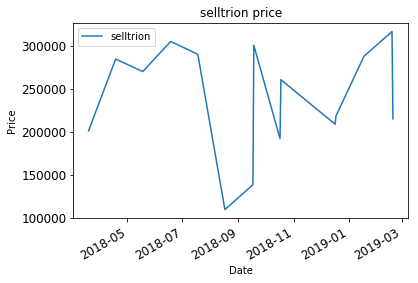

/Users/rira/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


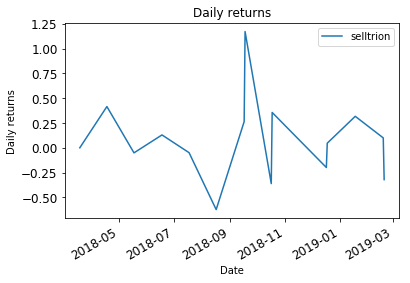

mean : 0.07482342394697072
std : 0.4037757950350509


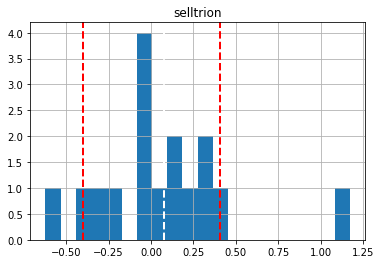

kurtosis : selltrion    2.935244
dtype: float64


In [14]:
test_run()

# 2 companies comparison

In [19]:
def test_run():
    # Read data
    dates = pd.date_range('28-02-18', '28-02-19') # 일년간 데이터.
    symbols = ['selltrion', 'skhynix' ] # 회사이름.
    df = MakeData(symbols, dates)
    plot_data(df)
    
    # Compute daily returns
    daily_returns = compute_daily_returns(df)
    plot_data(daily_returns, title = "Daily returns" , ylabel="Daily returns")
    
    #hist
    # daily_returns.hist(bins = 20)
    daily_returns['selltrion'].hist(bins = 20,label = 'selltrion', edgecolor = "black")
    daily_returns['skhynix'].hist(bins = 20,label = 'skhynix',edgecolor = "black")
    plt.legend(loc = 'upper right')
    plt.show()

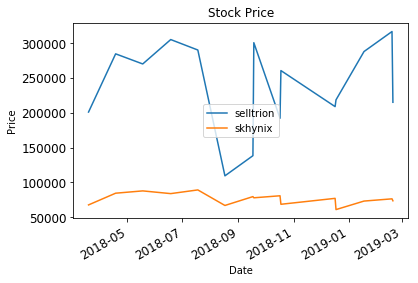

/Users/rira/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


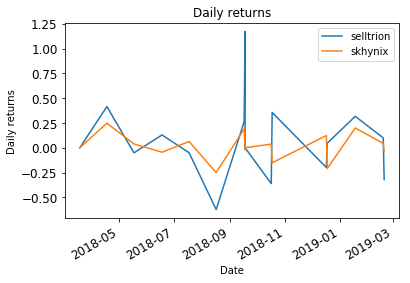

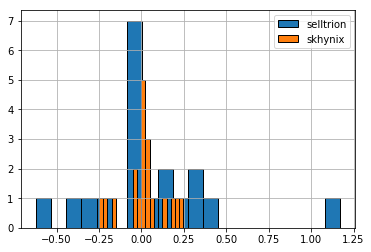

In [20]:
test_run()

# scatter plot

In [23]:
# scatterplot
def test_run():
    # Read data
    dates = pd.date_range('28-02-18', '28-02-19') # 일년간 데이터.
    symbols = ['selltrion', 'skhynix', 'samsung' ] # 회사이름.
    df = MakeData(symbols, dates)
    plot_data(df)
    plt.show()

    
    # Compute daily returns
    daily_returns = compute_daily_returns(df)
    plot_data(daily_returns, title = "Daily returns" , ylabel="rates")
    plt.show()
    
    # scatterplot skhynix vs. samsung
    daily_returns.plot(kind = "scatter",title = "selltrion VS. skhynix",  x='selltrion', y = 'skhynix',edgecolor = "black")
    plt.show()
    daily_returns.plot(kind = "scatter", title = "selltrion VS. samsung", x="selltrion", y = "samsung", edgecolor = "black")
    plt.show()

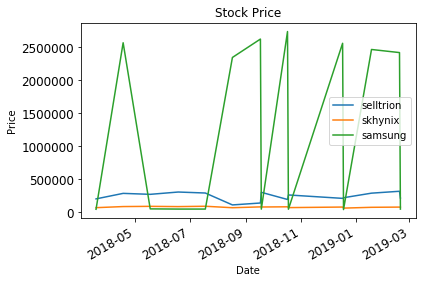

/Users/rira/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


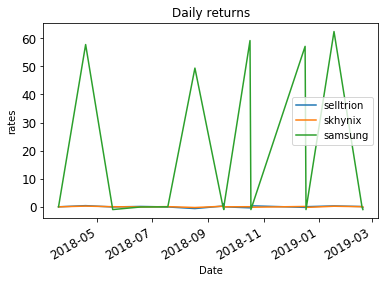

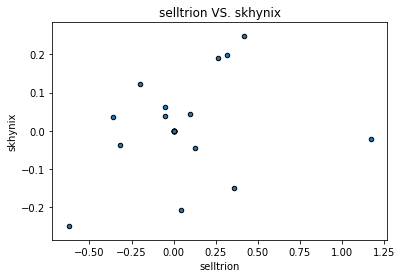

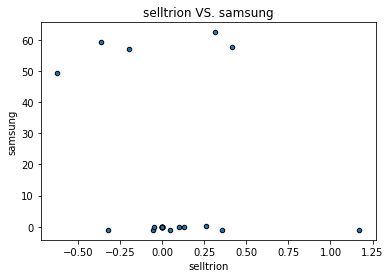

In [24]:
test_run()

In [25]:
def test_run():
    # Read data
    dates = pd.date_range('28-02-18', '18-03-19') # 일년간 데이터.
    symbols = ['selltrion', 'skhynix', 'samsung' ] # 회사이름.
    df = MakeData(symbols, dates)
    
    # Compute daily returns
    daily_returns = compute_daily_returns(df)
    
    # scatterplot selltrion vs. skhynix
    daily_returns.plot(kind = "scatter", x='selltrion', y = 'skhynix', edgecolor = "black")
    beta_XOM, alpha_XOM = np.polyfit(daily_returns['selltrion'],daily_returns['skhynix'], 1)
    print("beta_XOM", beta_XOM)
    print("alpha_XOM", alpha_XOM)
    plt.plot(daily_returns['selltrion'], beta_XOM*daily_returns['selltrion'], alpha_XOM, '-', color = "r") # mX + b =
    plt.show()
    
    # scatterplot selltrion vs. samsung
    daily_returns.plot(kind = "scatter", x='selltrion', y = 'samsung',edgecolor = "black")
    #beta_GLD, alpha_GLD = np.polyfit(daily_returns['SPY'],daily_returns['GLD'], 1)
    #print("beta_GLD", beta_GLD)
    #print("alpha_GLD", alpha_GLD)
    #plt.plot(daily_returns['SPY'], beta_GLD*daily_returns['SPY'], alpha_GLD, '-', color = "r") # mX + b =
    plt.show()
    
    
    # correlations
    print(daily_returns.corr(method = 'pearson')) 
    # pearson is more commonly used method when you calculate correlation.

beta_XOM 0.12269143247071626
alpha_XOM 0.010245116761457155


/Users/rira/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


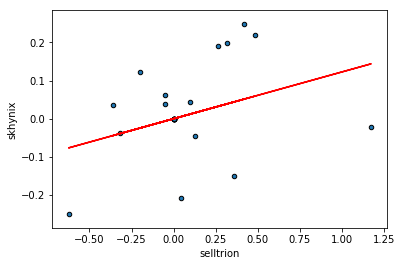

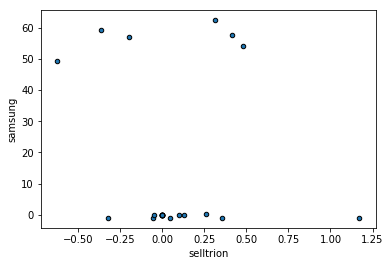

           selltrion   skhynix   samsung
selltrion   1.000000  0.345964 -0.091394
skhynix     0.345964  1.000000  0.424389
samsung    -0.091394  0.424389  1.000000


In [26]:
test_run()